# Bank Marketing Campaign Classification

**Dataset overview:**

1. **Age**: Numeric feature representing the age of the bank client.
2. **Job**: Categorical feature indicating the type of job the client has.
3. **Marital**: Categorical feature indicating the marital status of the client.
4. **Education**: Categorical feature representing the educational level of the client.
5. **Default**: Categorical feature indicating whether the client has credit in default.
6. **Housing**: Categorical feature indicating whether the client has a housing loan.
7. **Loan**: Categorical feature indicating whether the client has a personal loan.
8. **Balance**: Numeric feature representing the balance of the individual.
9. **Contact**: Categorical feature indicating the communication type used to contact the client.
10. **Month**: Categorical feature indicating the month of the last contact.
11. **Day**: Categorical feature indicating the day of the week of the last contact.
12. **Duration**: Numeric feature representing the duration of the last contact in seconds.
13. **Campaign**: Numeric feature representing the number of contacts performed during the current campaign for this client.
14. **Pdays**: Numeric feature representing the number of days since the client was last contacted from a previous campaign.
15. **Previous**: Numeric feature representing the number of contacts performed before the current campaign for this client.
16. **Poutcome**: Categorical feature representing the outcome of the previous marketing campaign.
17. **deposit (Target)**: Binary feature indicating whether the client has subscribed to a term deposit.

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import chi2_contingency

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import (mean_squared_error, accuracy_score, 
                            f1_score, precision_score, recall_score, 
                            confusion_matrix,classification_report,roc_curve,auc)

In [125]:
df = pd.read_csv('./data/bank_uci.csv', sep = ';')

In [126]:
df.rename({'y': 'deposit'}, axis='columns', inplace = True)

In [127]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [128]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [58]:
df.shape

(45211, 17)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## EDA

In [60]:
df.deposit.value_counts(normalize = True)

deposit
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

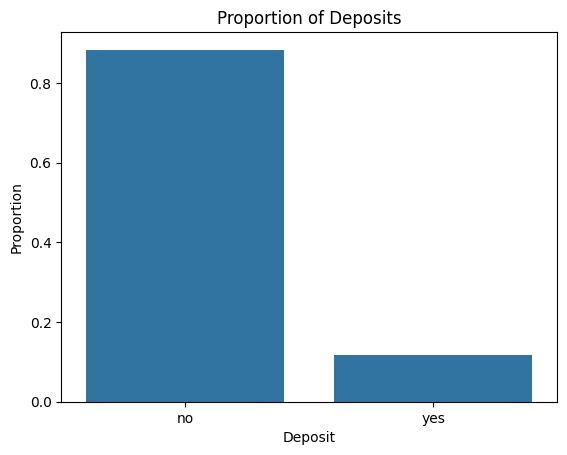

In [61]:
value_counts = df['deposit'].value_counts(normalize=True)

sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Deposit')
plt.ylabel('Proportion')
plt.title('Proportion of Deposits')
plt.show()

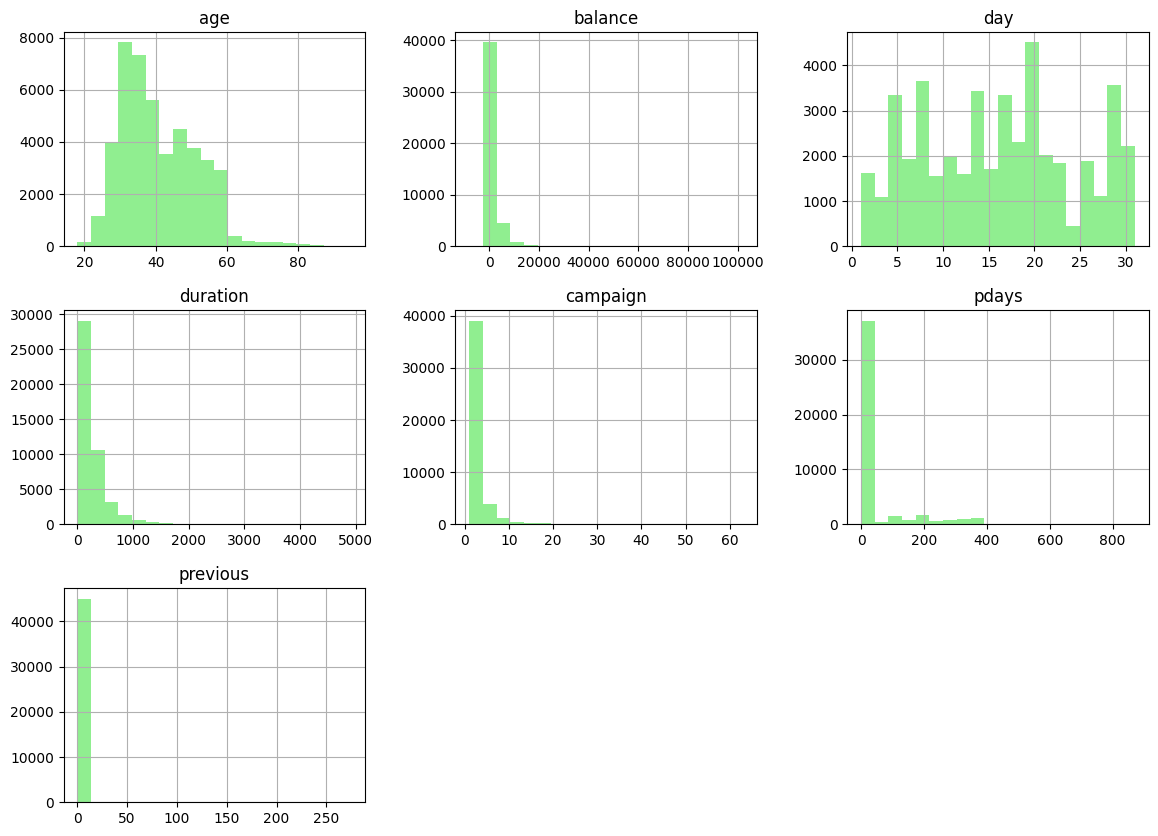

In [129]:
df.hist(bins=20, figsize=(14,10), color='lightgreen')
plt.show()

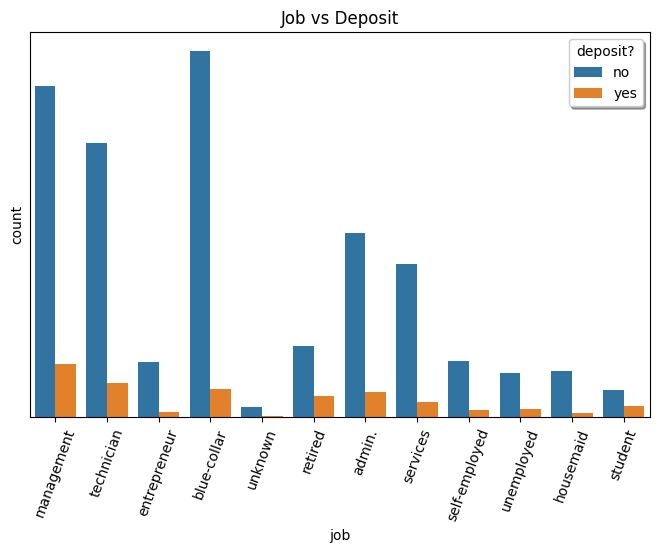

In [63]:
plt.figure(figsize=(8, 5));
plt.title('Job vs Deposit')
g = sns.countplot(x= 'job', hue = 'deposit', data=df)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='deposit?', ncol=1, fancybox=True, shadow=True)
plt.show()

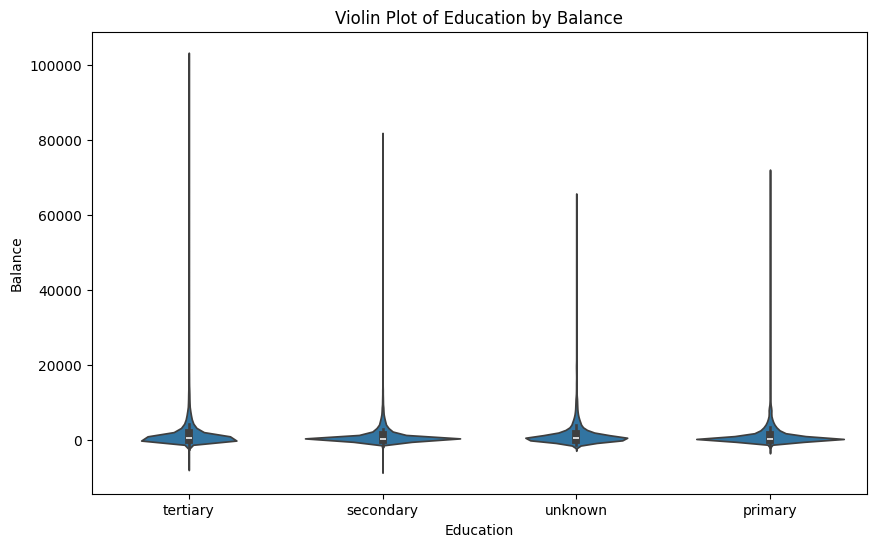

In [64]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='education', y='balance')
plt.xlabel('Education')
plt.ylabel('Balance')
plt.title('Violin Plot of Education by Balance')
plt.show()

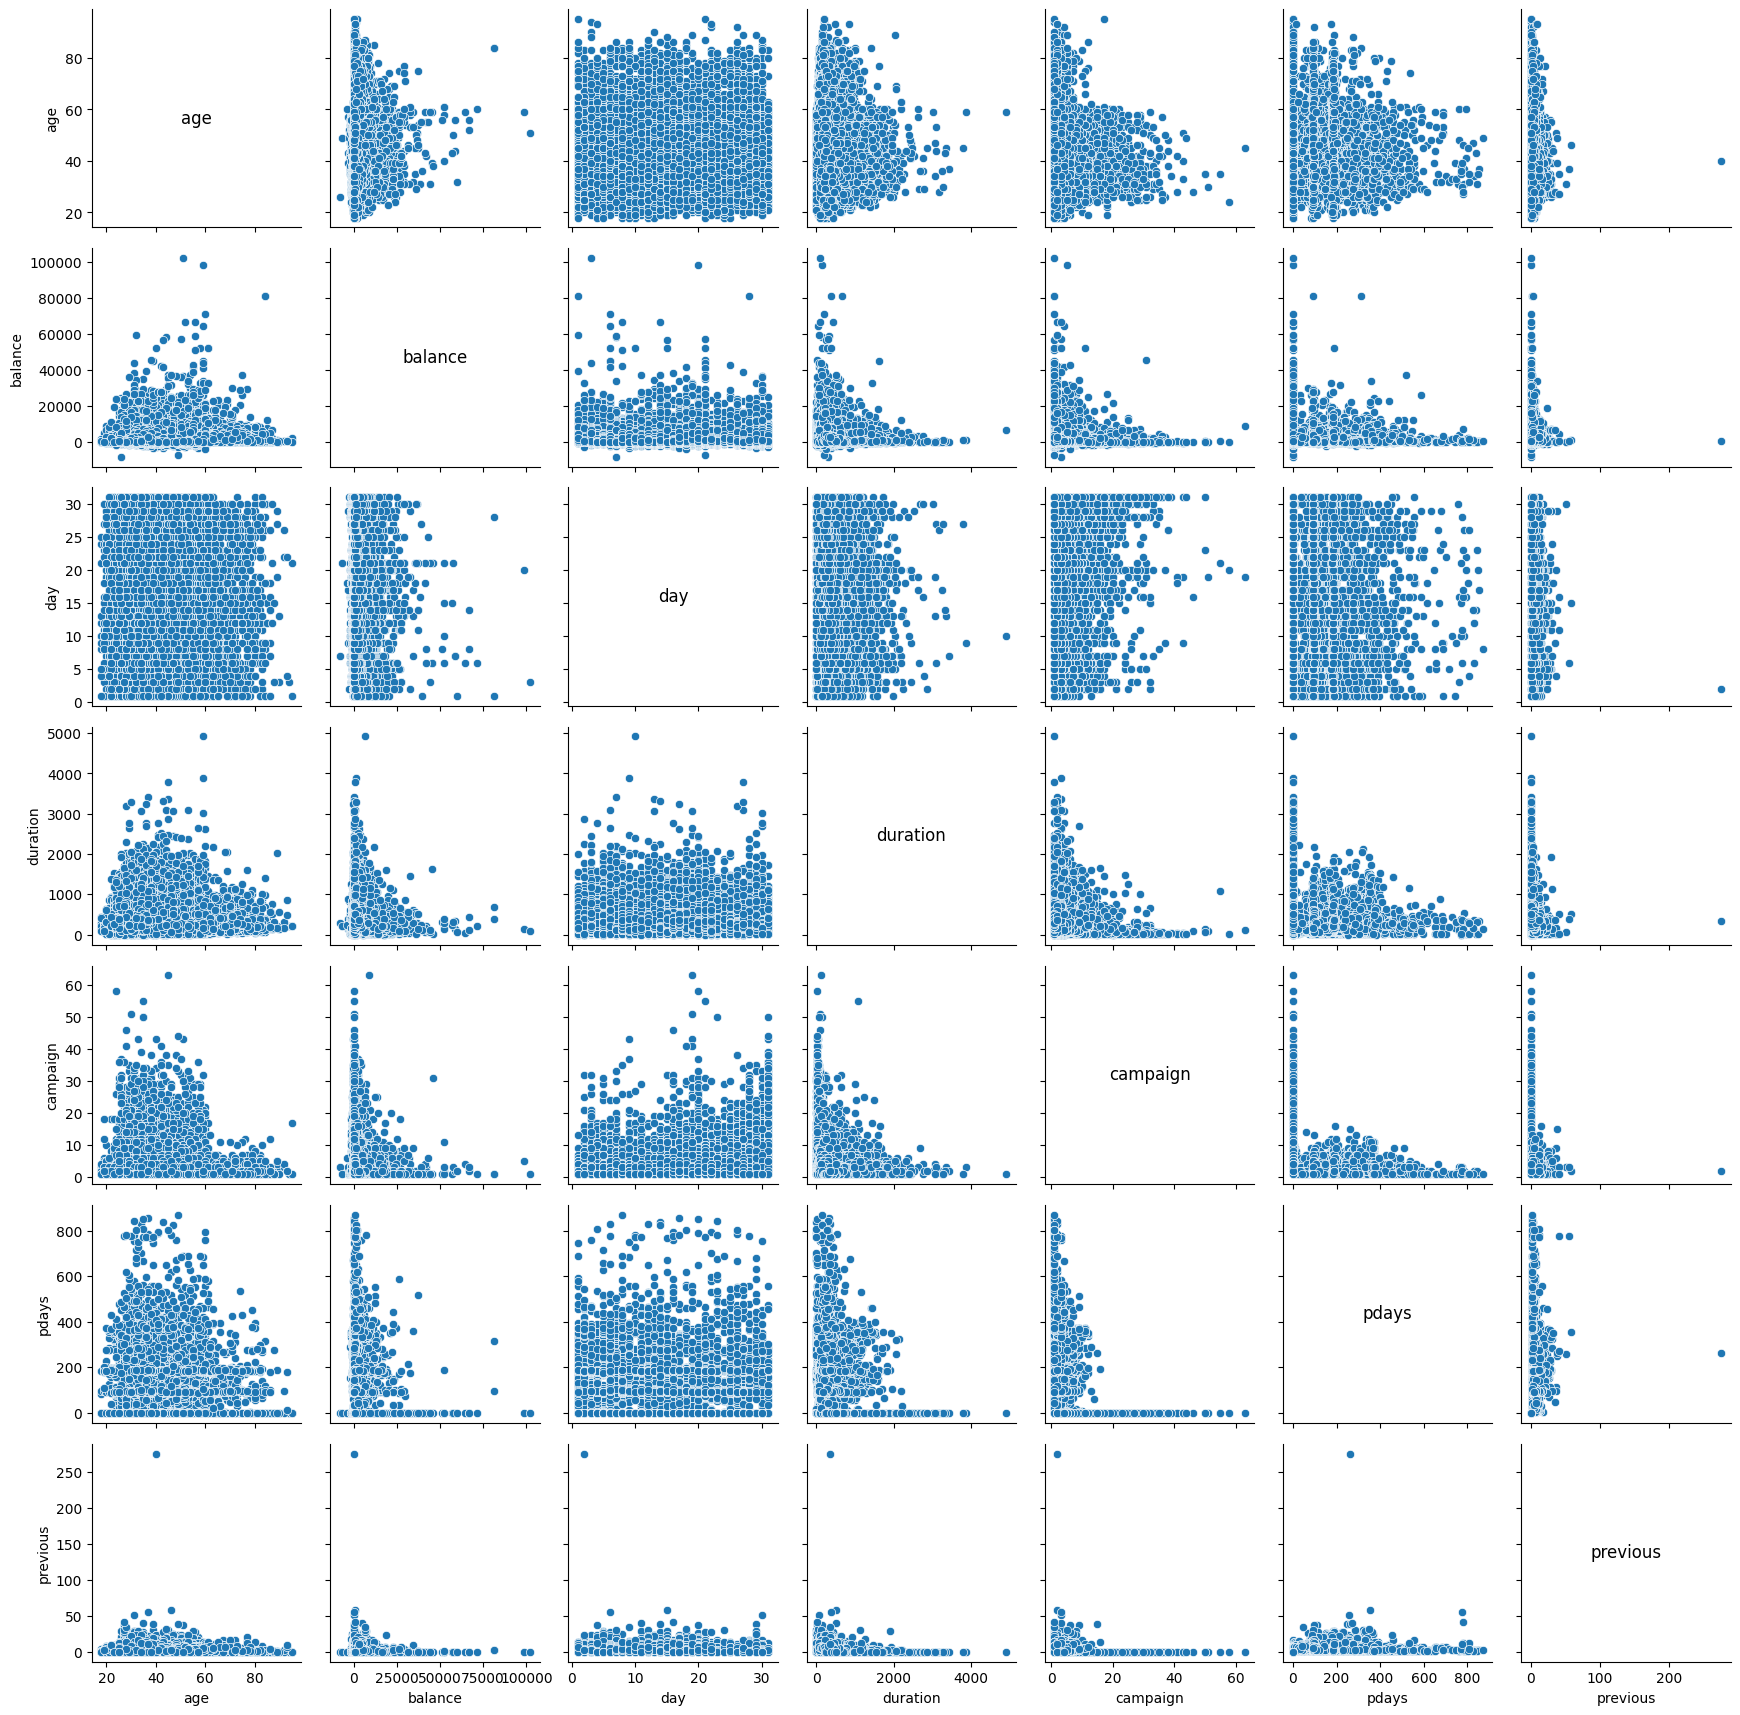

In [65]:
numerical_columns = df.select_dtypes(exclude=['object'])

grid = sns.PairGrid(numerical_columns)

grid.map_lower(sns.scatterplot)
grid.map_upper(sns.scatterplot)

def label_diag(x, *args, **kwargs):
    plt.annotate(x.name, (0.5, 0.5), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12)

grid.map_diag(label_diag)

plt.show()

In [66]:
def categorical_descriptive_stats(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    stats_list = []

    for col in categorical_columns:

        count = df[col].count()

        frequency = df[col].value_counts()

        mode = frequency.idxmax()
        mode_freq = frequency.max()
        mode_pct = (mode_freq / count) * 100

        cardinality = df[col].nunique()

        second_mode = 'N/A'
        second_mode_freq = 'N/A'
        second_mode_pct = 'N/A'
        if len(frequency) > 1 and frequency.iloc[0] != frequency.iloc[1]:
            second_mode = frequency.index[1]
            second_mode_freq = frequency.iloc[1]
            second_mode_pct = (second_mode_freq / count) * 100

        stats_dict = {
            'Feature': col,
            'Count': count,
            '% Miss.': (1 - (count / df.shape[0])) * 100,
            'Card.': cardinality,
            'Mode': mode,
            'Mode Freq.': mode_freq,
            'Mode %': mode_pct,
            '2nd Mode': second_mode,
            '2nd Mode Freq.': second_mode_freq,
            '2nd Mode %': second_mode_pct
        }
        stats_list.append(stats_dict)

    stats_df = pd.DataFrame(stats_list)
    return stats_df

In [67]:
categorical_descriptive_stats(df)

,Feature,Count,% Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,job,45211,0.0,12,blue-collar,9732,21.525735,management,9458,20.919688
1,marital,45211,0.0,3,married,27214,60.193316,single,12790,28.289576
2,education,45211,0.0,4,secondary,23202,51.319369,tertiary,13301,29.419831
3,default,45211,0.0,2,no,44396,98.197341,yes,815,1.802659
4,housing,45211,0.0,2,yes,25130,55.583818,no,20081,44.416182
5,loan,45211,0.0,2,no,37967,83.977351,yes,7244,16.022649
6,contact,45211,0.0,3,cellular,29285,64.774059,unknown,13020,28.798301
7,month,45211,0.0,12,may,13766,30.448342,jul,6895,15.250713
8,poutcome,45211,0.0,4,unknown,36959,81.747805,failure,4901,10.840282
9,deposit,45211,0.0,2,no,39922,88.301520,yes,5289,11.698480


In [68]:
def plot_categorical_distributions(df, filename=None):
    categorical_columns = df.select_dtypes(include=['object']).columns

    num_rows = np.ceil(len(categorical_columns) / 2).astype(int)

    plt.figure(figsize=(20, 5 * num_rows))

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(num_rows, 2, i)
        sns.countplot(x=df[col], color='skyblue')

        mode_val = df[col].mode()[0]

        plt.title(f'Histogram of {col}')
        plt.xlabel(f'Mode: {mode_val}')
        plt.ylabel('Frequency')

    plt.tight_layout()

    if filename:
        plt.savefig(filename)
        plt.close()
        return filename
    else:
        plt.show()

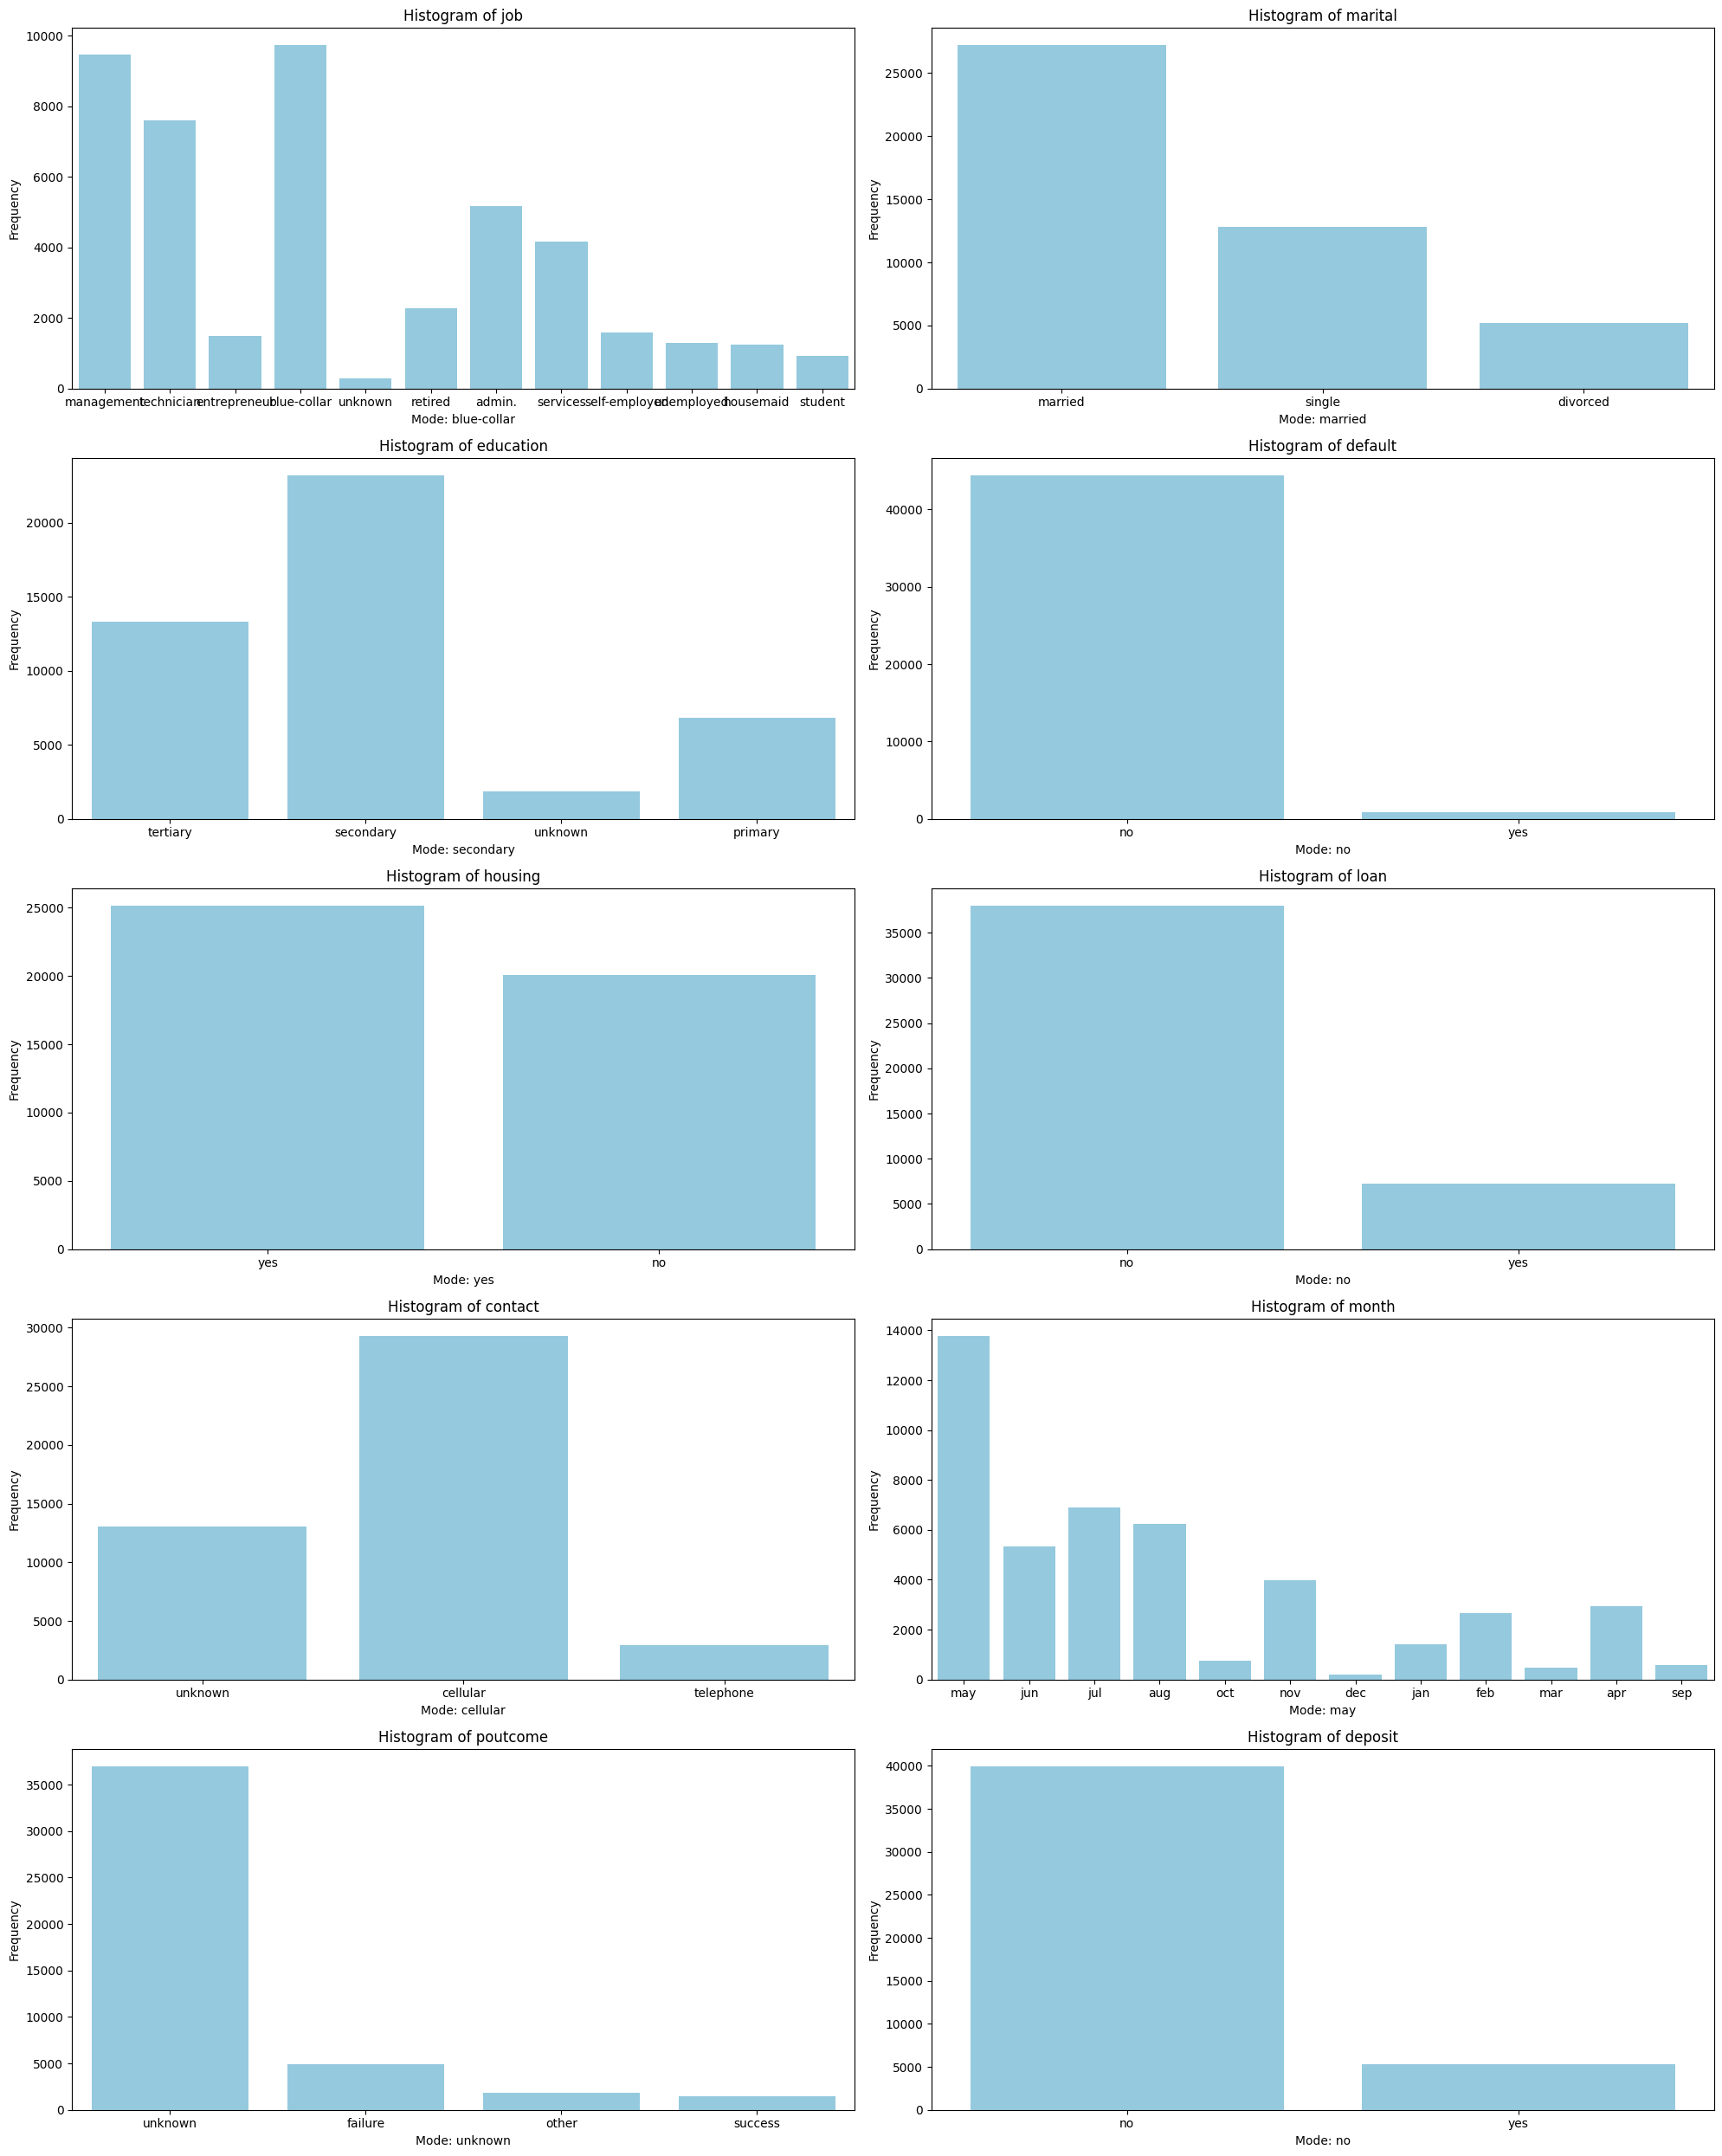

In [69]:
plot_categorical_distributions(df)

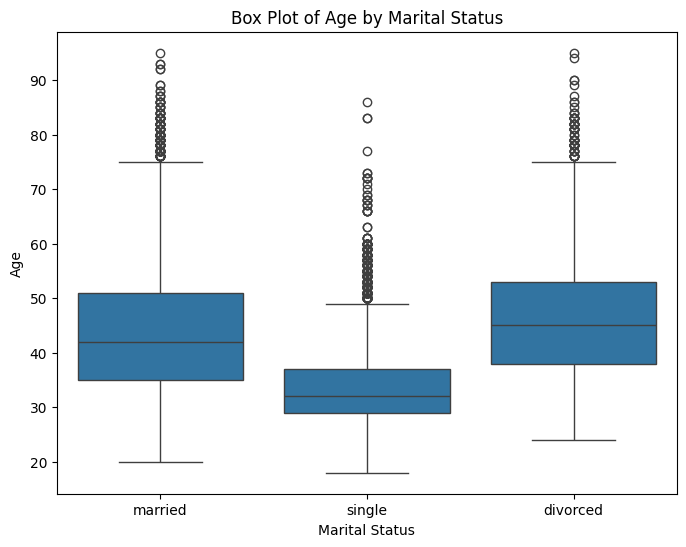

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='marital', y='age')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Box Plot of Age by Marital Status')
plt.show()

## Provjera multikolinearnosti

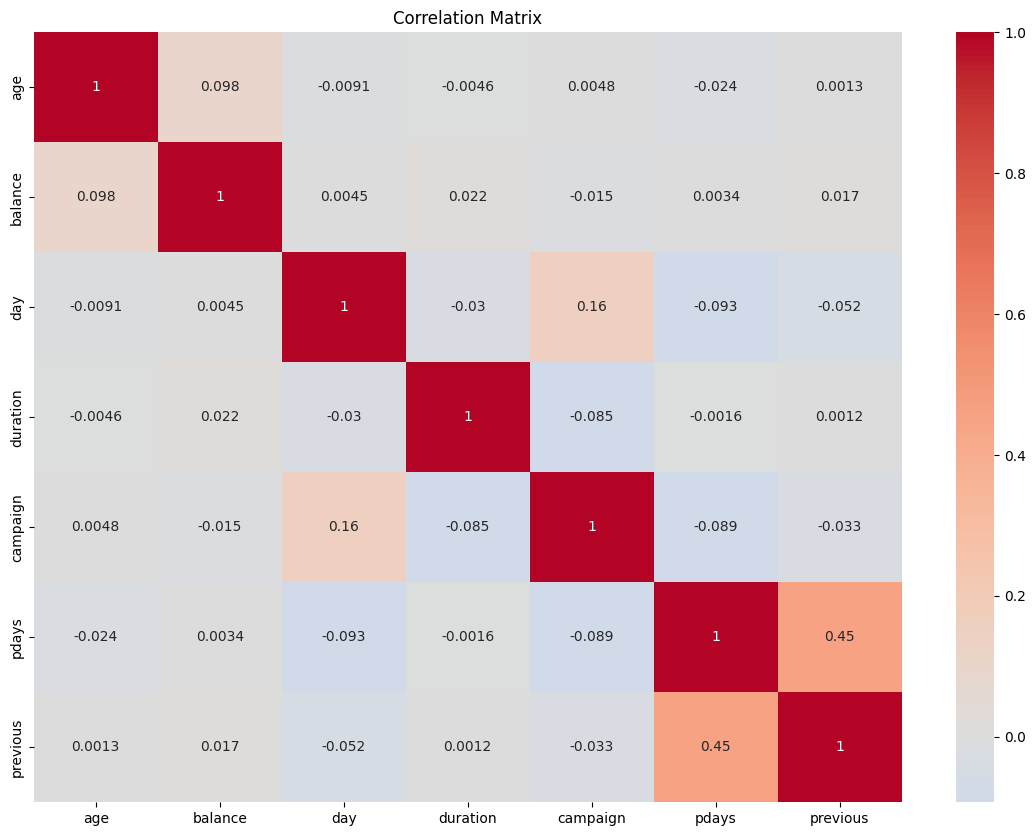

In [71]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix_numeric = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

threshold = 0.75
highly_correlated_pairs = []

for i in range(correlation_matrix_numeric.shape[0]):
    for j in range(i):
        if abs(correlation_matrix_numeric.iloc[i, j]) > threshold:
            pair = (correlation_matrix_numeric.index[i], correlation_matrix_numeric.columns[j])
            highly_correlated_pairs.append(pair)

In [72]:
print(f'Broj visokokoreliranih numeričkih značajki: {len(highly_correlated_pairs)}')

Broj visokokoreliranih numeričkih značajki: 0


In [73]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

In [74]:
target_variable = 'deposit'
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_vars.remove(target_variable)

correlation_matrix_categorical = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 != var2:
            correlation_matrix_categorical.loc[var1, var2] = cramers_v(df[var1], df[var2])
        else:
            correlation_matrix_categorical.loc[var1, var2] = 1.0

high_corr_threshold = 0.75
high_corr_vars = set()

for var1 in correlation_matrix_categorical.columns:
    for var2 in correlation_matrix_categorical.index:
        if var1 != var2 and correlation_matrix_categorical.loc[var1, var2] > high_corr_threshold:
            high_corr_vars.add(var1)
            break

In [75]:
print(f'Broj visokokoreliranih kategoričkih značajki: {len(high_corr_vars)}')

Broj visokokoreliranih kategoričkih značajki: 0


In [76]:
correlation_matrix_categorical

,job,marital,education,default,housing,loan,contact,month,poutcome
job,1.0,0.206012,0.458259,0.036533,0.28174,0.106502,0.150465,0.11024,0.064214
marital,0.206012,1.0,0.121622,0.01923,0.020685,0.051937,0.045091,0.072317,0.029083
education,0.458259,0.121622,1.0,0.015896,0.119339,0.080279,0.122795,0.110105,0.035652
default,0.036533,0.01923,0.015896,1.0,0.005858,0.077008,0.024406,0.058675,0.040403
housing,0.28174,0.020685,0.119339,0.005858,1.0,0.041262,0.213585,0.504213,0.143147
loan,0.106502,0.051937,0.080279,0.077008,0.041262,1.0,0.016274,0.182827,0.055248
contact,0.150465,0.045091,0.122795,0.024406,0.213585,0.016274,1.0,0.512127,0.207471
month,0.11024,0.072317,0.110105,0.058675,0.504213,0.182827,0.512127,1.0,0.214336
poutcome,0.064214,0.029083,0.035652,0.040403,0.143147,0.055248,0.207471,0.214336,1.0


## Čišćenje podataka

### Nedostajuće vrijednosti

In [130]:
pd.DataFrame(df.isna().sum(), columns = ['Missing'])

,Missing
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


### Stršila

In [131]:
def create_boxplots(df, exclude_col='day_of_week', export_png=False, filename='boxplot.png'):
    if exclude_col in df.columns:
        numeric_cols = df.drop(columns=[exclude_col]).select_dtypes(include=[np.number])
    else:
        numeric_cols = df.select_dtypes(include=[np.number])

    num_cols = numeric_cols.shape[1]

    num_rows = (num_cols + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.ravel()

    for i, col in enumerate(numeric_cols.columns):
        Q1 = numeric_cols[col].quantile(0.25)
        Q3 = numeric_cols[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = numeric_cols[col][(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)]

        axes[i].boxplot(numeric_cols[col].dropna(), vert=True, patch_artist=True)
        axes[i].set_title(col)
        axes[i].set_xlabel(f'Outliers: {len(outliers)}')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    if export_png:
        plt.savefig(filename)
        plt.close()
        return filename

    plt.show()

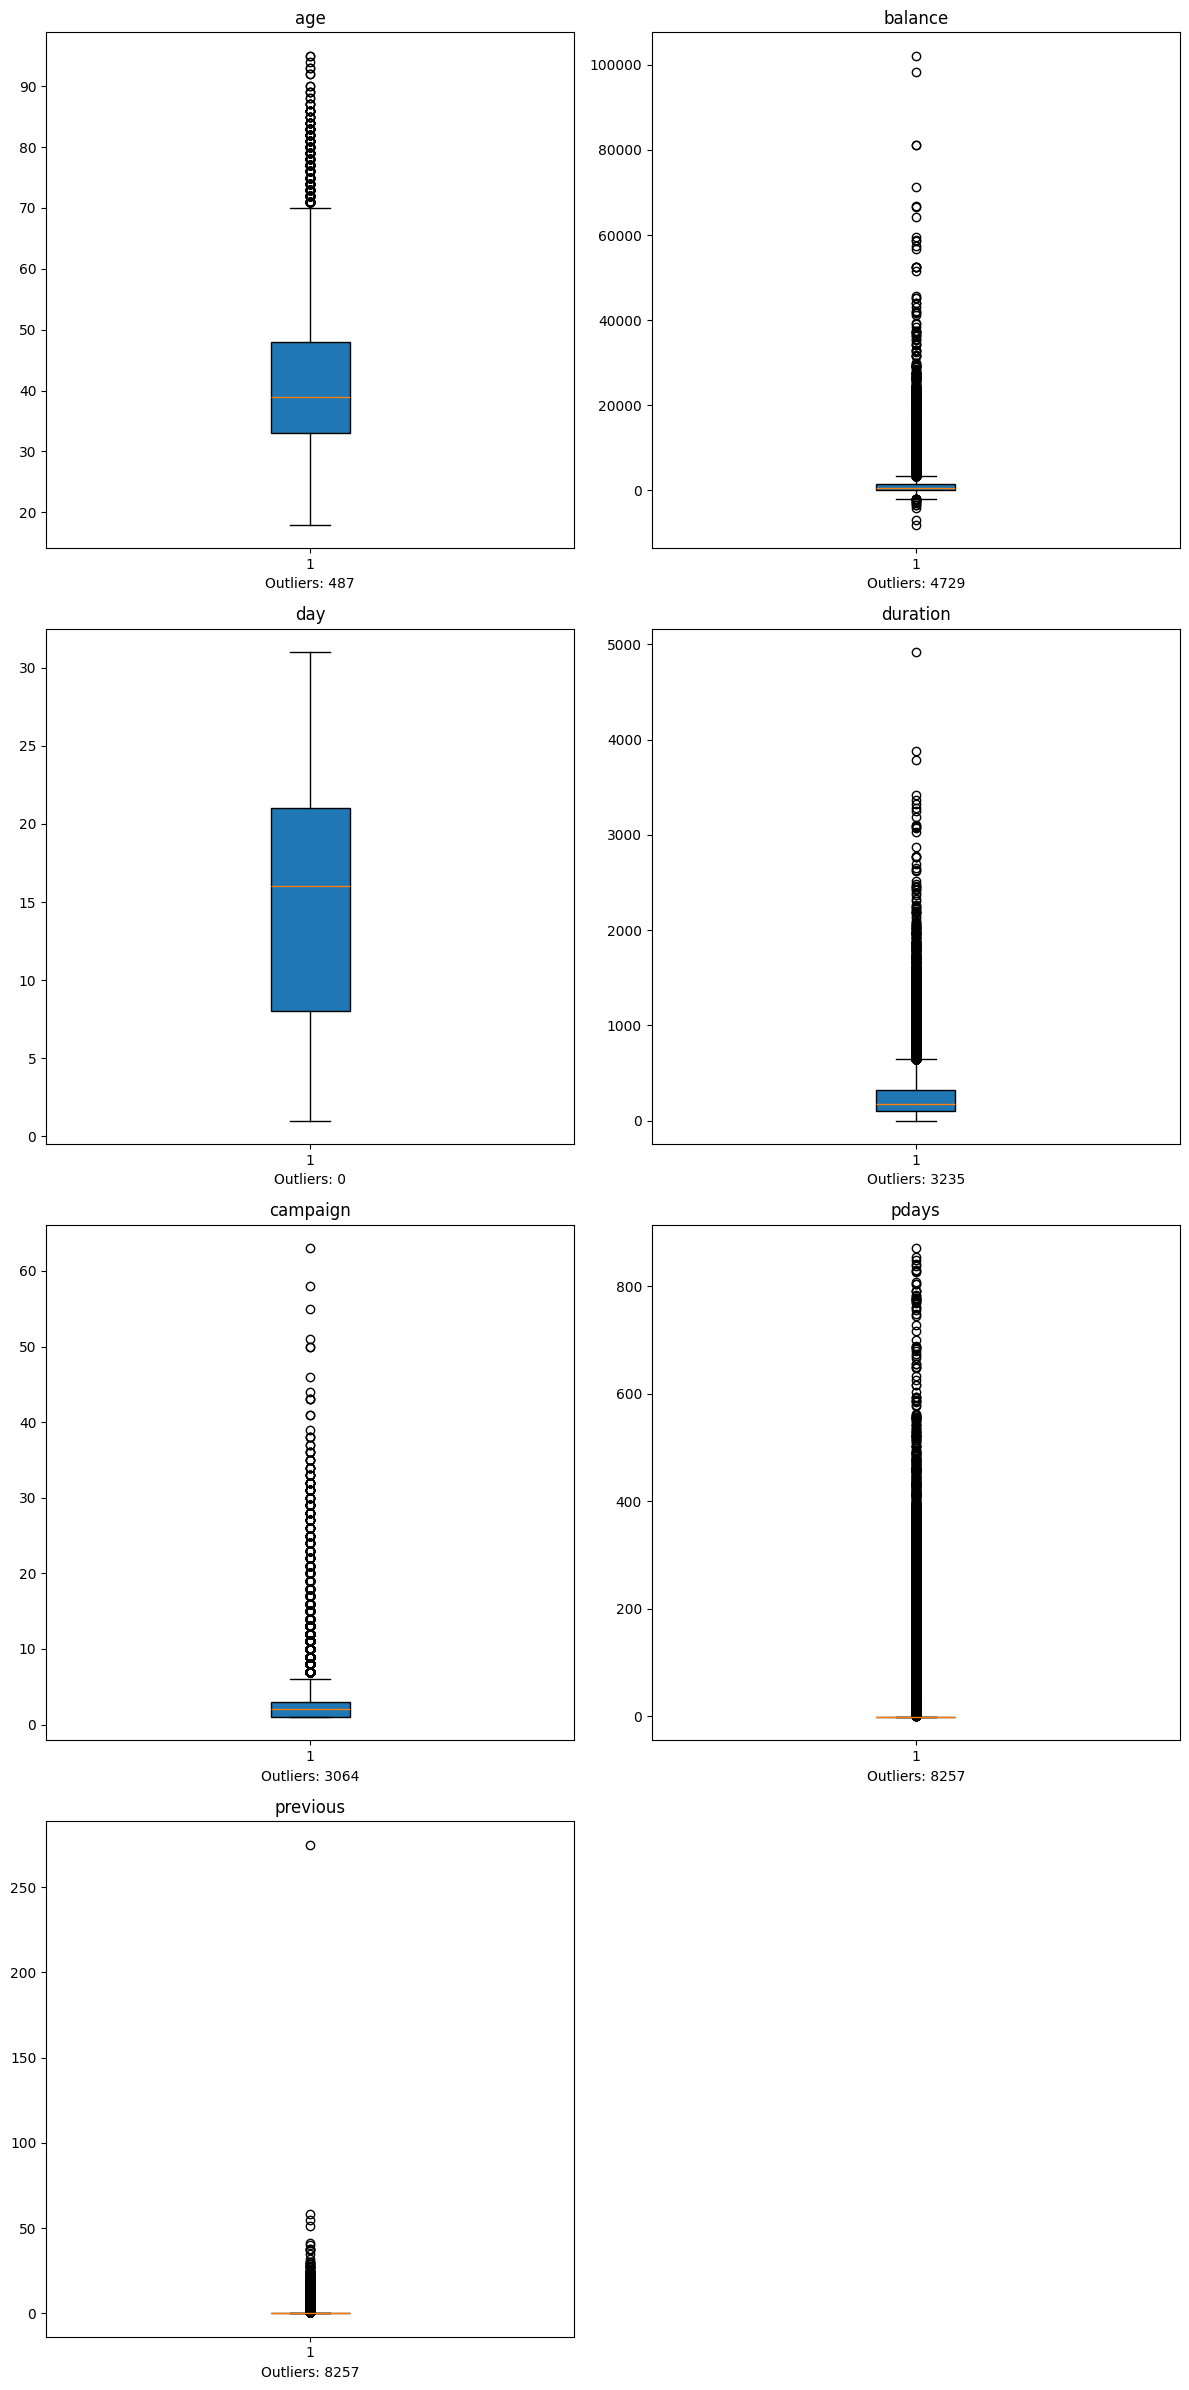

In [132]:
create_boxplots(df)

In [133]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numeric_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
outliers_dict = {col: identify_outliers(df, col) for col in numeric_columns}

outliers_summary = {col: len(outliers_dict[col]) for col in numeric_columns}
outliers_summary

{'age': 487,
 'balance': 4729,
 'duration': 3235,
 'campaign': 3064,
 'pdays': 8257,
 'previous': 8257}

#### Micanje stršila

In [134]:
def winsorize_series(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    series = series.apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return series

for col in ['age', 'balance', 'duration', 'campaign', 'previous']:
    df[col] = winsorize_series(df[col])

In [135]:
winsorized_statistics = df[['age', 'balance', 'duration', 'campaign', 'previous']].describe()
winsorized_statistics

,age,balance,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.0
mean,40.868185,933.706974,234.939307,2.392228,0.0
std,10.394895,1176.765369,176.749932,1.600111,0.0
min,18.000000,-1962.000000,0.000000,1.000000,0.0
25%,33.000000,72.000000,103.000000,1.000000,0.0
50%,39.000000,448.000000,180.000000,2.000000,0.0
75%,48.000000,1428.000000,319.000000,3.000000,0.0
max,70.500000,3462.000000,643.000000,6.000000,0.0


In [136]:
outliers_dict = {col: identify_outliers(df, col) for col in numeric_columns}

outliers_summary = {col: len(outliers_dict[col]) for col in numeric_columns}
outliers_summary

{'age': 0,
 'balance': 0,
 'duration': 0,
 'campaign': 0,
 'pdays': 8257,
 'previous': 0}

In [137]:
def categorize_pdays(pdays):
    if pdays == -1:
        return 'never contacted'
    elif pdays <= 60:
        return 'recently contacted'
    else:
        return 'contacted long ago'

In [138]:
df['pdays_category'] = df['pdays'].apply(categorize_pdays)

In [139]:
df['pdays_category'].value_counts()

pdays_category
never contacted       36954
contacted long ago     7963
recently contacted      294
Name: count, dtype: int64

In [140]:
df.drop('pdays', axis = 1, inplace = True)

In [141]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'deposit', 'pdays_category'],
      dtype='object')

In [142]:
def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = outliers.shape[0]
    
    return pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])

In [143]:
count_outliers(df)

,Outlier Count
age,0
balance,0
day,0
duration,0
campaign,0
previous,0


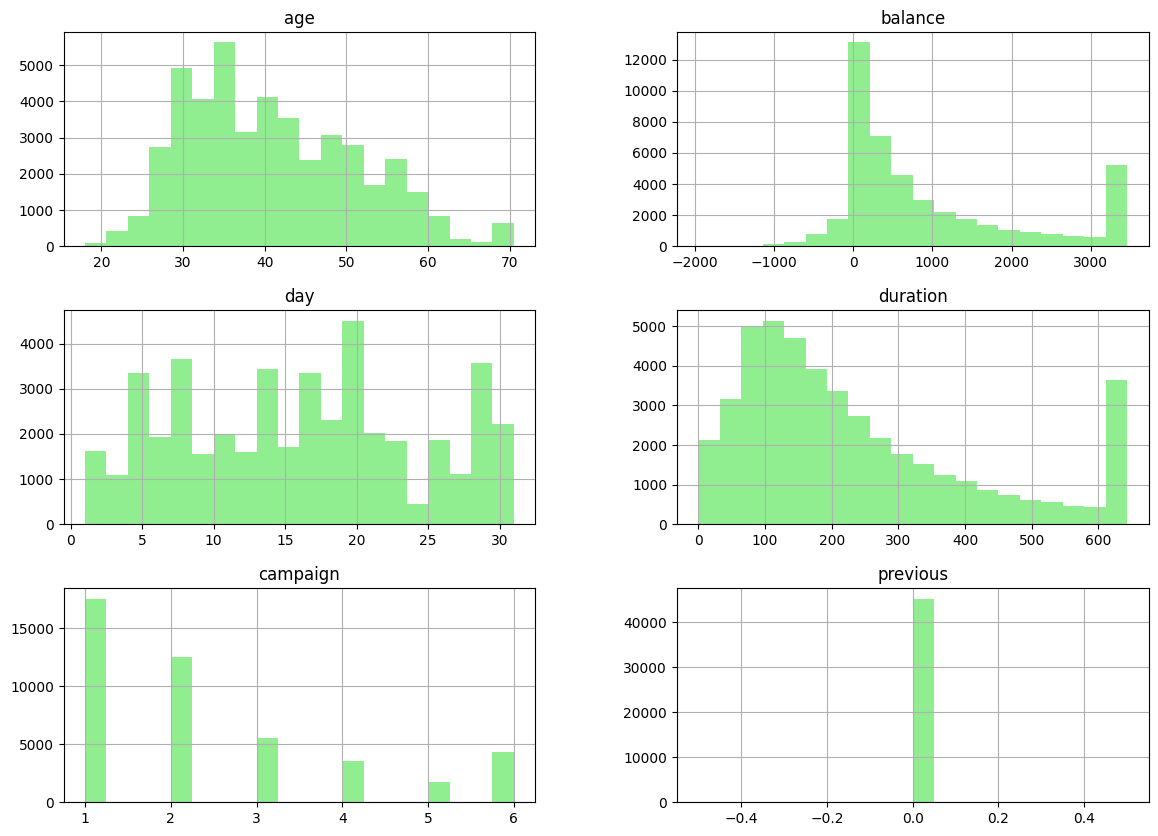

In [155]:
df.hist(bins=20, figsize=(14,10), color='lightgreen')
plt.show()

### Transformacija i skaliranje numeričkih varijabli

In [178]:
df_sqrt = df.copy()
df_sqrt['balance_sqrt'] = df_sqrt['balance'].apply(lambda x: np.sqrt(x + 1) if x > 0 else 0)
df_sqrt['duration_sqrt'] = df_sqrt['duration'].apply(lambda x: np.sqrt(x))
df_sqrt['campaign_sqrt'] = df_sqrt['campaign'].apply(lambda x: np.sqrt(x))
df_sqrt['age_sqrt'] = df_sqrt['age'].apply(lambda x: np.sqrt(x + 1))

In [179]:
scaler = StandardScaler()
df_sqrt[['age_sqrt', 'balance_sqrt', 'duration_sqrt', 'campaign_sqrt']] = scaler.fit_transform(df_sqrt[['age_sqrt', 'balance_sqrt', 'duration_sqrt', 'campaign_sqrt']])

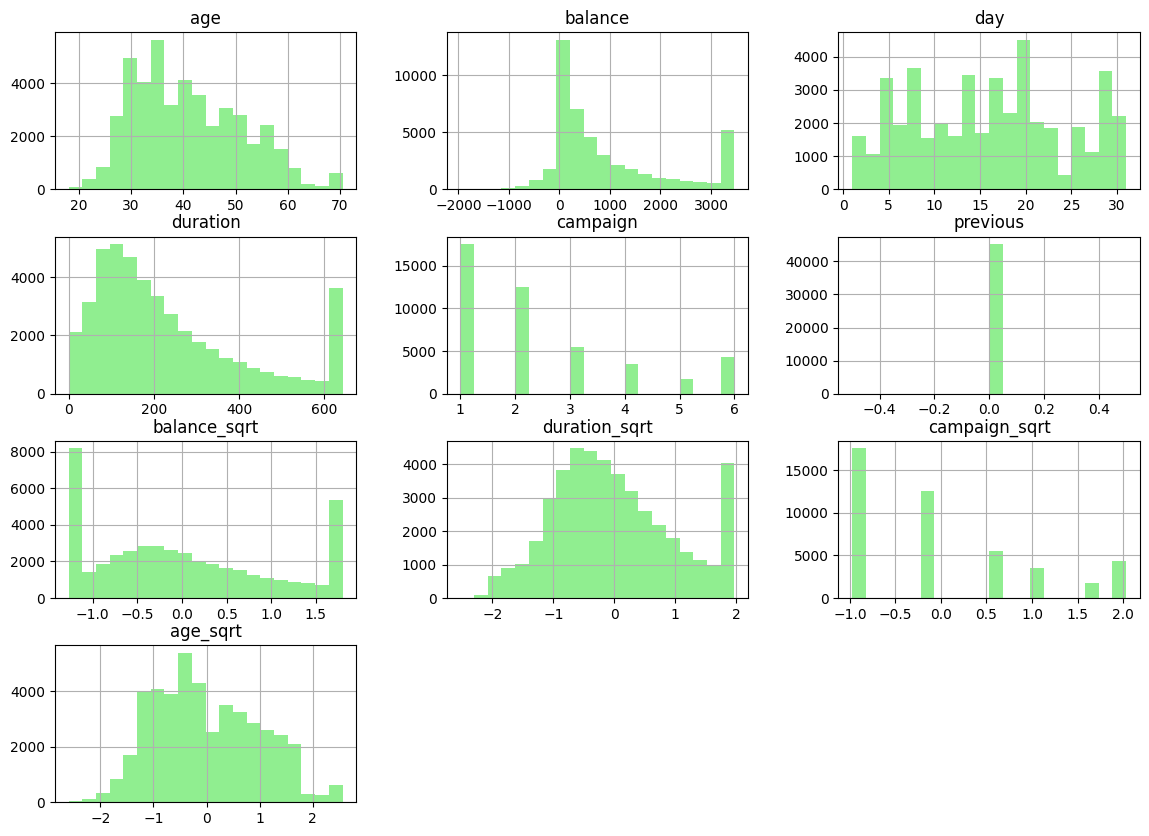

In [180]:
df_sqrt.hist(bins=20, figsize=(14,10), color='lightgreen')
plt.show()

### Kodiranje kategoričkih značajki

In [182]:
nominal_columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome']
ordinal_columns = ['education', 'pdays_category']

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_nominal = pd.DataFrame(encoder.fit_transform(df_sqrt[nominal_columns]), columns=encoder.get_feature_names_out(nominal_columns))

label_encoder = LabelEncoder()
df_sqrt['education_encoded'] = label_encoder.fit_transform(df_sqrt['education'])
df_sqrt['pdays_category_encoded'] = label_encoder.fit_transform(df_sqrt['pdays_category'])

df_sqrt['y_encoded'] = df_sqrt['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [184]:
df_sqrt_catcomb = pd.concat([df_sqrt[['age_sqrt', 'balance_sqrt', 'duration_sqrt', 'campaign_sqrt']], encoded_nominal, df_sqrt[['education_encoded', 'pdays_category_encoded']], df_sqrt['y_encoded']], axis=1)
df_sqrt_catcomb.head()

,age_sqrt,balance_sqrt,duration_sqrt,campaign_sqrt,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown,education_encoded,pdays_category_encoded,y_encoded
0,1.588070,1.145286,0.337480,-0.974856,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1,0
1,0.361179,-0.985938,-0.347685,-0.974856,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0
2,-0.745047,-1.181446,-0.980251,-0.974856,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0
3,0.638600,0.754642,-0.825429,-0.974856,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1,0
4,-0.745047,-1.198037,-0.031784,-0.974856,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1,0
